In [1]:
!python -V

Python 3.10.6


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
sklearn.__version__

'1.2.2'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/Bank Customer Churn Prediction.csv")

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop('customer_id', axis=1, inplace=True)

In [7]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df = pd.get_dummies(df, columns = ['gender','country'])
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male,country_France,country_Germany,country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [10]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [11]:
y = df['churn']
X = df.drop('churn', axis=1)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

log_clf = LogisticRegression(random_state = 42)
param_grid = {
            'penalty' : ['l2','l1'],
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameters for using this model is {'C': 0.1, 'penalty': 'l2'}


In [14]:
classifier = LogisticRegression(C = best_parameters['C'],
                                penalty = best_parameters['penalty'],
                                random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_pred, y_test, average = 'macro')

In [16]:
print('Accuracy is: {}'.format(accuracy))
print('F1_score is: {}'.format(f1))
print(matrix)

Accuracy is: 0.8126666666666666
F1_score is: 0.5912465670530187
[[2323   93]
 [ 469  115]]


In [17]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)


#Train the classifier.
bbc.fit(X_train, y_train)
preds = bbc.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, preds)
matrix = confusion_matrix(y_test, preds)
f1 = f1_score(preds, y_test, average = 'macro')

In [19]:
print('Accuracy is: {}'.format(accuracy))
print('F1_score is: {}'.format(f1))
print(matrix)

Accuracy is: 0.8196666666666667
F1_score is: 0.7348121978546094
[[2078  338]
 [ 203  381]]


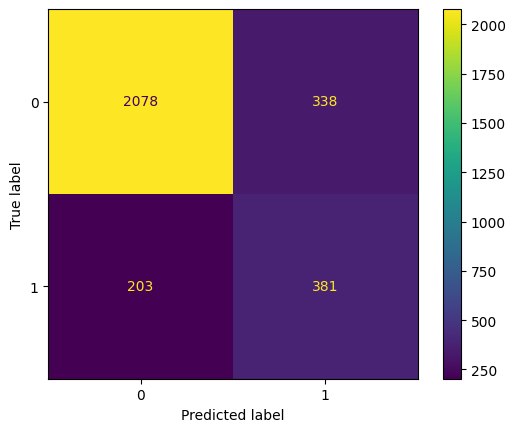

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
model_cmd = ConfusionMatrixDisplay(confusion_matrix = matrix)
model_cmd.plot();